# GEOG 5160 6160 Lab 06

In this lab, we will introduce `scikit-learn`, a toolkit for machine learning in Python. This provides a standard interface managing a machine learning workflow, including setting up training and testing data, running different algorithms and evaluating the models. 

Let's start by importing the packages that we will need

In [1]:
import pandas as pd
import sklearn

We'll start now by loading the housing data in to a Pandas DataFrame, and using `shape` to look at the size of the dataset. 

In [11]:
housing = pd.read_csv("../datafiles/housing.csv")
housing.shape

(20640, 10)

Now, use the `describe()` method to get an overview of the different variables that are included. 

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Before starting building models, we need to check and clean the data. Some things that we may want to check for are:

- missing values
- variable conversions
- outliers

Let's check to see which of the features contain missing values. The following code uses a couple of methods linked together. First `isna()` to check each value in the data frame to see if it is a missing value and flag it as `True` or `False`. Then we use `any()` which returns `True` of `False` for each column if there is at least one `True` (i.e. missing) values in that column:

In [9]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

This tells us that the only column with missing values is `total_bedrooms`. We'll now remove these using the `dropna()` method to remove each row with a missing value:

In [13]:
housing = housing.dropna()
housing.shape

(20433, 10)

Next, we'll transform two variables: `total_rooms` and `total_bedrooms`. These are the total number of rooms *per district*, but as the number of households vary among districts, we can't use them directly. Instead, we'll convert these to the average room number per house as follows:

In [16]:
housing['avg_rooms'] = housing.total_rooms / housing.households
housing['avg_bedrooms'] = housing.total_bedrooms / housing.households

### Data visualization

Next, we'll visualize some of the data, starting with a quick map of the locations, then the median house values. First, we load `matplotlib` and set it to run inline in the notebook. 

In [17]:
%matplotlib inline
import matplotlib as plt

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

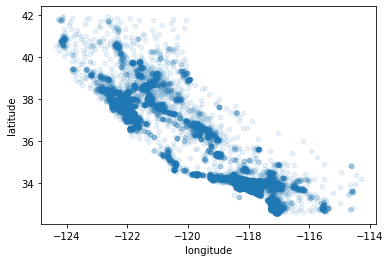

In [19]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

To make a better plot of the house values, we'll use `GeoPandas`, a package that extends `Pandas` to include spatial information (you'll need to install this if you have not done so already). Now load the package, and use it to read in the California border shapefile:

In [36]:
import geopandas as gpd
ca_bnd = gpd.read_file("../datafiles/ca/ca.shp")
ca_bnd.crs

The last line of code prints the coordinate reference system (`crs`) for the California border polygon. As the housing data is in WGS84, we can convert the polygon to this use the `to_crs()` method:

In [37]:
ca_bnd = ca_bnd.to_crs(epsg=4326)
ca_bnd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now let's plot the border, then add points for each location and use the `median_house_value` to set the color:

<AxesSubplot:>

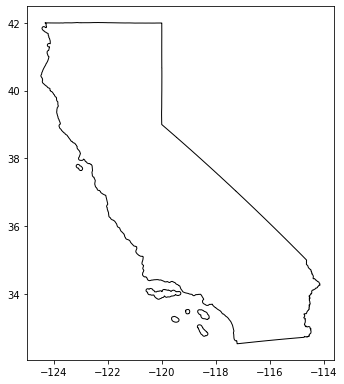

In [38]:
ca_bnd.plot(figsize = (6.5, 6.5), edgecolor="black", facecolor="None")

`pandas` is a hugely popular, and still growing, Python library used across a range of disciplines from environmental and climate science, through to social science, linguistics, biology, as well as a number of applications in industry such as data analytics, financial trading, and many others. 

`pandas` is designed to help you deal with a whole set of tasks necessary for data analysis and manipulation. It simplifies the loading of data from external sources such as text files and databases, as well as providing ways of analyzing and manipulating data once it is loaded into your computer. The features provided in `pandas` automate and simplify a lot of the common tasks that would take many lines of code to write in the basic Python language. 

If you have used R’s dataframes before, or the `numpy` package in Python, you may find some similarities in the Python `pandas` package. But if not, don’t worry because this tutorial doesn’t assume any knowledge of NumPy or R, only basic-level Python.

To use `pandas` functions, you will first need to `import` the package using the following code. By convention, the `pandas` module is almost always imported `as pd`. Every time we use a pandas feature thereafter, we can shorten what we type by just typing `pd`, such as `pd.some_function()`.

Note the list of numbers, organized into a single column on the right, and the index on the left (0 - 3). Note that Python is zero-indexed, i.e. indices start at 0, not 1. If you just want the values, not the index:

In [4]:
scottish_hills = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}
dataframe = pd.DataFrame(scottish_hills)
print(dataframe)

               Hill Name  Height   Latitude  Longitude
0              Ben Nevis    1345  56.796850  -5.003508
1             Ben Macdui    1309  57.070453  -3.668262
2              Braeriach    1296  57.078628  -3.728024
3             Cairn Toul    1291  57.054611  -3.710420
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416


The `pd.DataFrame()` function then converts this dictionary to a DataFrame. Dictionary keys are used for column headers, and each Series becomes a column of values (note that a row index number was automatically generated).

In [5]:
#### Reading from files

`pandas` has a built function (`pd.read_csv()`) that allows you to read in comma separated value (CSV) files. An alternative is to use Python's built in `CSV` library. Here, we'll read in the Penguin dataset, and use this to create a new DataFrame called `penguins`:

In [6]:
penguins = pd.read_csv("../datafiles/penguins.csv")

DataFrames have a set of attributes and methods that can be used to find out basic information about them. For example, `shape` returns the dimensions of the data (here, 344 rows and 8 columns):

In [7]:
penguins.shape

(344, 8)

Use `head(6)` to get the first six lines (changing the `6` will show more or fewer lines):

In [8]:
penguins.head(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


And you can use `tail()` to see the last few rows

In [9]:
penguins.tail(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


If you want to just see the column names:

In [10]:
penguins.columns.values

array(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'], dtype=object)

Use `describe()` to get summary statistics on the columns (numeric only):

In [11]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Accessing values

You can access individual series in the DataFrame using the column name:

In [12]:
penguins['flipper_length_mm']

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 344, dtype: float64

Note that the 4th observation has a missing value marked by `NaN`. The pandas function `dropna()` allows us to remove all observations with missing values. Here, we create a new DataFrame, the extract the flipper length values again. Note that the length (shown at the bottom) has decreased. 

In [13]:
penguins2 = penguins.dropna()
penguins2['flipper_length_mm']

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 333, dtype: float64

You can also access individual Series using a `.` notation. 

In [14]:
penguins.flipper_length_mm

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 344, dtype: float64

You can also access values in a pandas DataFrame using a row, column index. The format for this is `dataframe.iloc[row]` or `dataframe.iloc[row, col]`. The `iloc` is important here - it tells pandas that you are using integer indices to access the data. To access the first row, simply enter

In [15]:
penguins.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

To access the first value of the first row

In [16]:
penguins.iloc[0,0]

'Adelie'

An equivalent approach would be to extract the first Series (the `species` column) and get the first value

In [17]:
penguins.species.iloc[0]

'Adelie'

If you want to access a range of rows and/or columns, you can use a colon to indicate the start and end of the range you want. To extract the first 3 rows of our DataFrame (note that the end of the range is the row after the range we want):

In [18]:
penguins.iloc[0:3]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


You can do the same to extract a range of columns. Here, we'll extract the 4 to 6th row (`3:6`),and the 3rd to 6th column (`2:6`):

In [19]:
penguins.iloc[3:6, 2:6]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


To add a new column to a DataFrame, simply specify the new Series name within `[]` and provide the vector of values. For example, to include an observation index starting at 1:

In [20]:
penguins['id'] = range(1,345)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,4
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,5


Unwanted columns can be removed using `drop()`:

In [21]:
penguins = penguins.drop('id', axis = 1)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Conditional selection

You can use the values in any of the DataFrame series to conditionally filter parts of the dataset. For example, if we want to find all the rows corresponding to female penguins:

In [22]:
penguins.sex == 'female'

0      False
1       True
2       True
3      False
4       True
       ...  
339    False
340     True
341    False
342    False
343     True
Name: sex, Length: 344, dtype: bool

This returns a Boolean Series, with all 'female' rows marked as `True`. If we incorporate this as an index, then this will only return the rows that meet the condition (i.e. are `True`):

In [23]:
penguins[penguins.sex == 'female']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
...,...,...,...,...,...,...,...,...
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009


And we can easily use this to create a new DataFrame with only the female penguin data.

In [24]:
females = penguins[penguins['sex'] == 'female']
females.shape

(165, 8)

You can also use conditional selection with numeric values. Here, we'll create a subset of all penguins weighing over 5kg:

In [25]:
bigbirds = penguins[penguins['body_mass_g'] > 5000]
bigbirds.shape

(61, 8)

You can include multiple conditions by including one of the usual set of operators ('AND' = `&`, 'OR' = `|`, 'NOT = `!`). In this example, we extract all Adelie penguins from Biscoe Island:

In [26]:
adelie_biscoe = penguins[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Biscoe')]
adelie_biscoe.shape

(44, 8)

## Split, apply, combine

pandas DataFrames include a useful method `groupby()`. This allows you to form subgroups of the data and run some functions on each one without having to create a new DataFrame for each subgroup. This is called split, apply, combine as we need to do three steps:

- split involves breaking up a data frame into groups
- apply involves running some function for each group
- combine merges the results into a new table

To demonstrate this, we'll calculate the mean body mass of female and male penguins. To start, we'll just calculate the mean for the whole dataset. We can do this by simply calling the `mean()` method on the Series:

In [27]:
penguins.body_mass_g.mean()

4201.754385964912

Now let's group the penguins by `sex`:

In [28]:
penguins.groupby('sex')

This creates a `groupby` index. To actually calculate the mean weight, we can simply append the `mean()` method to this:

In [29]:
penguins.groupby('sex').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,
female,42.096970,16.425455,197.363636,3862.272727,2008.042424
male,45.854762,17.891071,204.505952,4545.684524,2008.041667


As we didn't specify which data Series we wanted the mean for, Python has calculated this for all numeric Series. To only get the body mass values, simply include this following the `groupby()` method:

In [30]:
penguins.groupby('sex').body_mass_g.mean()

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

The `groupby()` method also works with two (or more) groups. Simply specify each group name between `[]`. To get the mean body mass for each species on each island:

In [31]:
penguins.groupby(['species', 'island'])['body_mass_g'].mean()

species    island   
Adelie     Biscoe       3709.659091
           Dream        3688.392857
           Torgersen    3706.372549
Chinstrap  Dream        3733.088235
Gentoo     Biscoe       5076.016260
Name: body_mass_g, dtype: float64

For two groups, pandas DataFrames have a `pivot_table()` method that allow you to make a better formatted version of this table. By default, this will calculate the mean of the variable for each combination of the `index` and `columns`):

In [32]:
penguins.pivot_table('body_mass_g', index = 'sex', columns = 'species')

species,Adelie,Chinstrap,Gentoo
sex,,,
female,3368.835616,3527.205882,4679.741379
male,4043.493151,3938.970588,5484.836066


## Plotting

### matplotlib

We will run through some simple plotting examples. We'll start by using matplotlib, one of the oldest and most established plotting packages for Python. We'll start by importing it:

In [33]:
import matplotlib.pyplot as plt

Unlike the previous packages, we are importing only a submodule of matplotlib called `pyplot`, which has a more user friendly interface than the basic package. To import a submodule, we specify `import module.submodule`. 

If you are using a jupyter notebook, the following code will force any plot made to appear in the notebook:

In [34]:
%matplotlib inline

We'll now plot a couple of variables from the penguins dataset as a scatter plot. The function is `plt.scatter`, and we need to specify the x and y variable, here as pandas Series:

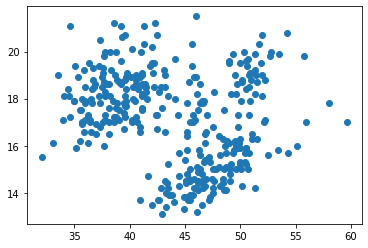

In [35]:
plt.scatter(x = penguins.bill_length_mm, y = penguins.bill_depth_mm)

The basic function produces a plot without annotations. Matplotlib works as a series of layers, and you can easily add axis labels and a title as follows:

Text(0.5, 1.0, 'Bill length vs bill depth')

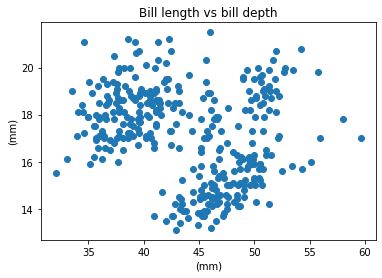

In [36]:
plt.scatter(x = penguins.bill_length_mm, y = penguins.bill_depth_mm)
plt.xlabel("(mm)")
plt.ylabel("(mm)")
plt.title("Bill length vs bill depth")

Matplotlib comes with a set of plot styles that change the plot layout, background color, etc. Use `plt.style.use()` to change the style. Here, we'll change to the `classic` style. The full set of styles can be found here:

https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

Text(0.5, 1.0, 'Bill length vs bill depth')

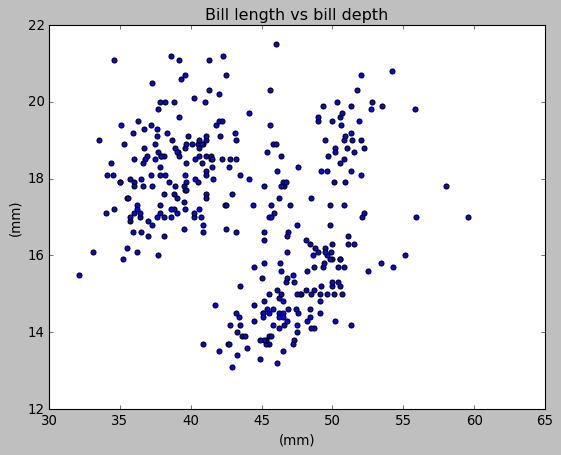

In [37]:
plt.style.use('classic')
plt.scatter(x = penguins.bill_length_mm, y = penguins.bill_depth_mm)
plt.xlabel("(mm)")
plt.ylabel("(mm)")
plt.title("Bill length vs bill depth")

Histograms can be made with the `plt.hist()` function. Note the use of `color` to set the fill and `ec` to set the outline

Text(0.5, 1.0, 'Histogram of bill length')

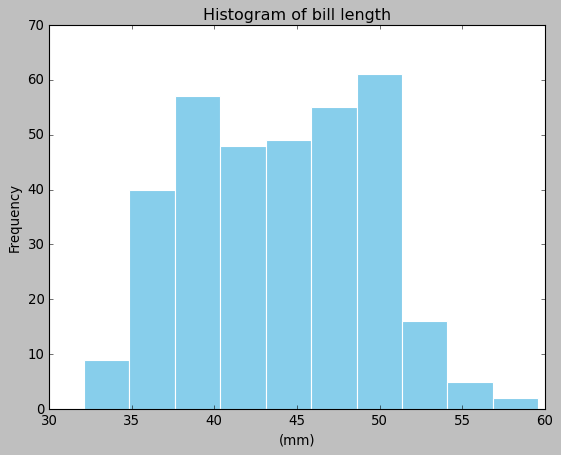

In [38]:
plt.hist(penguins.bill_length_mm, color = "skyblue", ec="white")
plt.xlabel("(mm)")
plt.ylabel("Frequency")
plt.title("Histogram of bill length")

### Seaborn

The matplotlib package has a great deal more flexibility than we can go through here. In particular, the ability to add elements individually allows you to make some very complex figures, but may take some time and trial and error to complete. A newer package, seaborn, was developed on top of matplotlib and provides a much simpler way to make complex figures, including easy use of color and size to represent data values. Start by loading this (it is usually imported with the pseudonym `sns`):

In [39]:
import seaborn as sns
sns.set()

To start with, let's make a simple bar plot of the Scottish Hill data. This shows the basic format for a seaborn plot: `sns.plotype(x, y, data)`:

<AxesSubplot:>

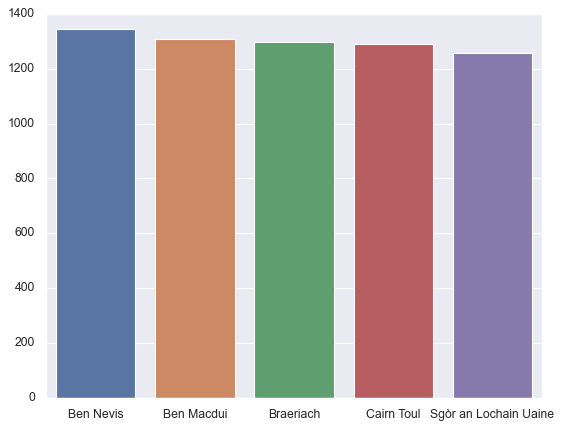

In [40]:
sns.barplot(x = "Hill Name", y = "Height", data = scottish_hills)

Now, we'll use the penguins data set to make a scatterplot of bill length and bill depth:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

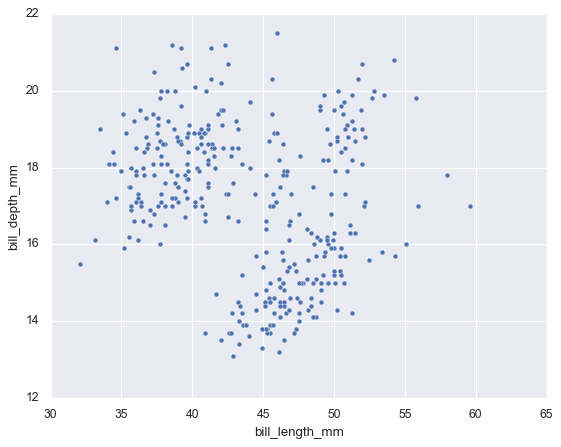

In [41]:
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data = penguins)

Like matplotlib, the seaborn package has a set of themes to change the layout of your plots. Here, we'll change to white background with black gridlines:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

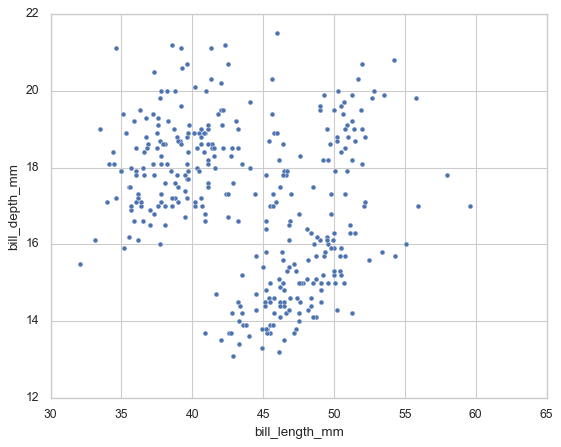

In [42]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data = penguins)

seaborn makes it easty to include a third (and possibly fourth) Series of data in the plot to control the size and color of symbols and lines. Here, we'll include the body mass Series to change the symbol size:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

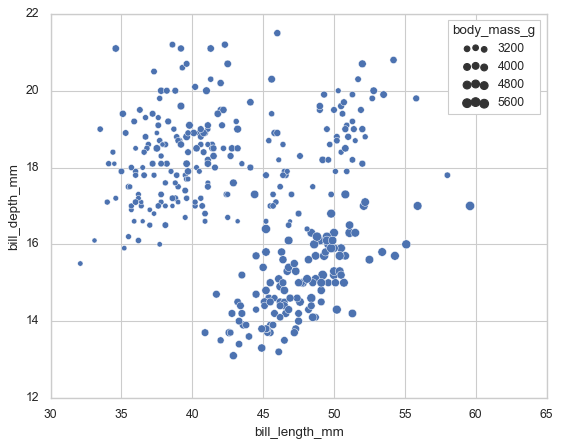

In [43]:
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", 
                size = "body_mass_g",
                data = penguins)

If you'd prefer to set the symbol color rather than size, then use the `hue` argument. We also use the `s` argument to increase the size of the symbols (try changing this to see the effect):

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

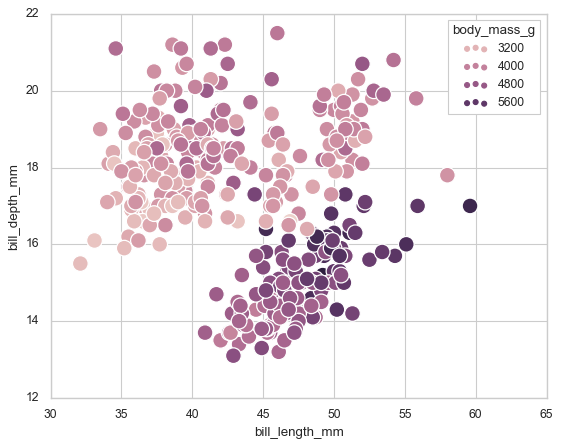

In [44]:
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", 
                s = 200, hue = "body_mass_g",
                data = penguins)

seaborn has a large set of built in color palettes (including the ColorBrewer palettes). To change the palette, simply use `palette = 'name'`. Here we'll use the ColorBrewer Blues palette. We also change the symbol outline to black to help highlight symbols with a lighter shade of blue. 

Further information about seaborns color palettes can be found here:
https://seaborn.pydata.org/tutorial/color_palettes.html

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

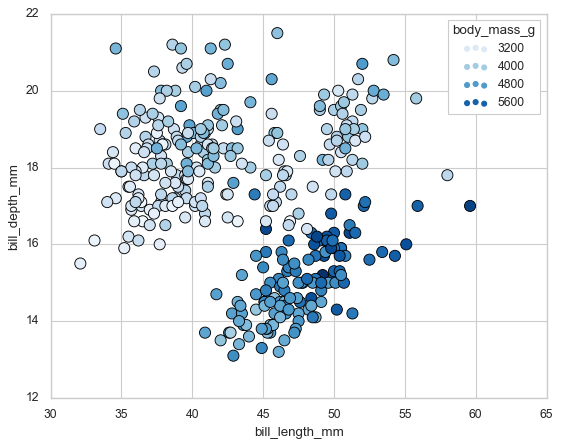

In [45]:
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", 
                s = 100, hue = "body_mass_g",
                palette = 'Blues', ec = 'black',
                data = penguins)

If you use a pandas Series with character strings, seaborn will use this to color by group level. For example, if we want to illustrate the difference between the different species of penguin:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

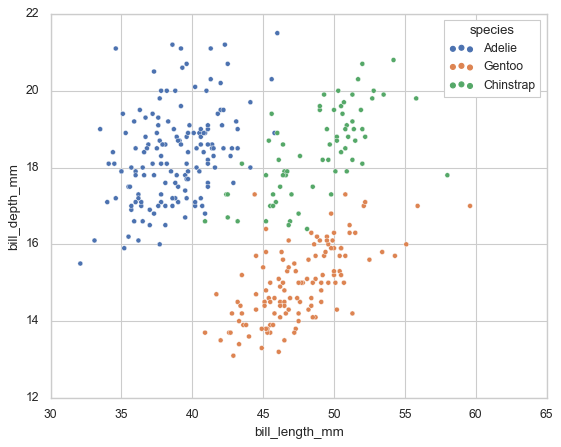

In [46]:
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", 
                hue = "species",
                data = penguins)

Because seaborn is built on top of matplotlib, it returns a object that can be modified with matplotlib functions. Here, we save the output in an object called `ax`. We can then add different axis labels and a title

Text(0.5, 1.0, 'Penguins, penguins, penguins')

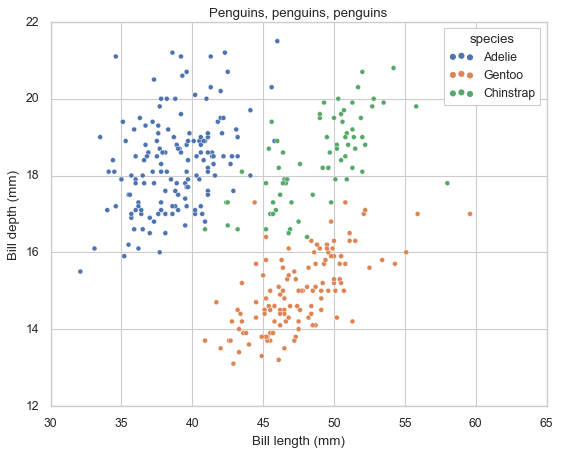

In [47]:
ax = sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", 
                     hue = "species",
                     data = penguins)
ax.set(xlabel = "Bill length (mm)", ylabel = "Bill depth (mm)")
ax.set_title("Penguins, penguins, penguins")

If you have a dataset with a set of groups, seaborn can use facets to split the full dataset into subplots, one per level of a group. This is done in two steps. First, we define which Series is to be used to partition the data, with the `col` argument used to split the group plots into columns in the final plot. Second, we use the `map()` method to create a new plot type for each level of the requested group:

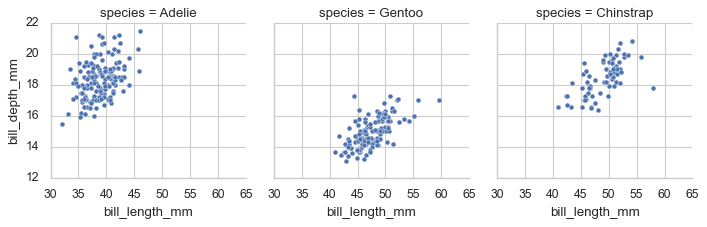

In [48]:
g = sns.FacetGrid(penguins, col="species")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")

With two groupings, you can split the data by each; one along the rows and one along the columns of the final plot. To illustrate this, we'll split the penguins data by both species (columns) and sex (rows):

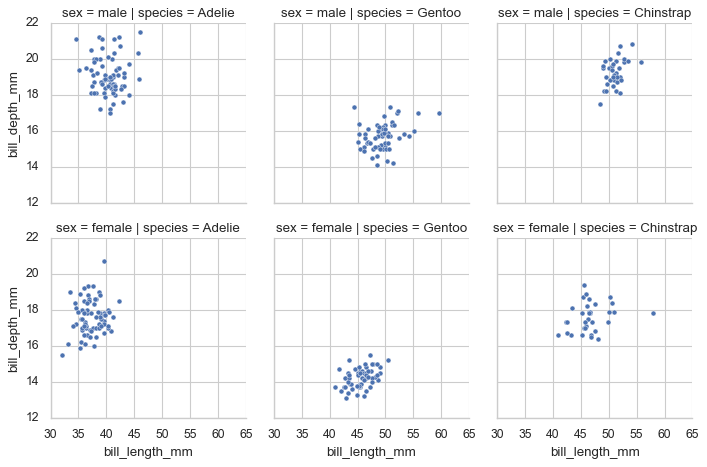

In [49]:
g = sns.FacetGrid(penguins, col = "species", row = "sex")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")

#### Other plot types

Boxplots

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

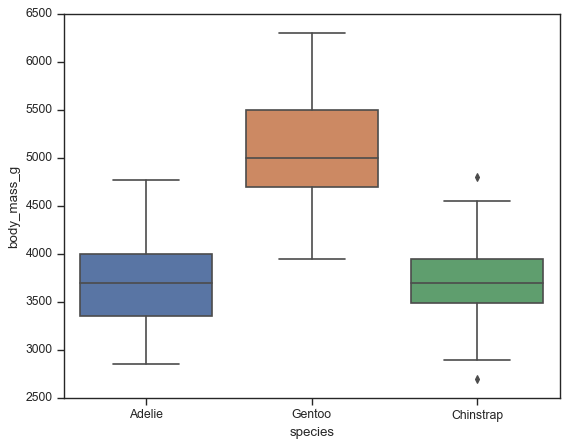

In [50]:
sns.set_theme(style="ticks")
sns.boxplot(x = "species", y = "body_mass_g", data = penguins)

Histograms (single variable)

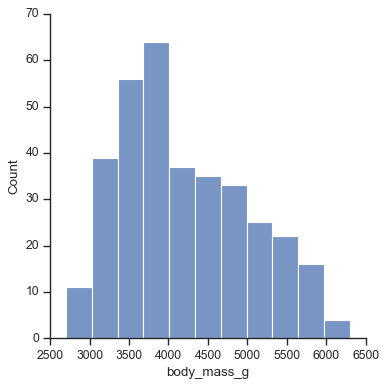

In [51]:
sns.displot(x = "body_mass_g", data = penguins)

Histograms by group

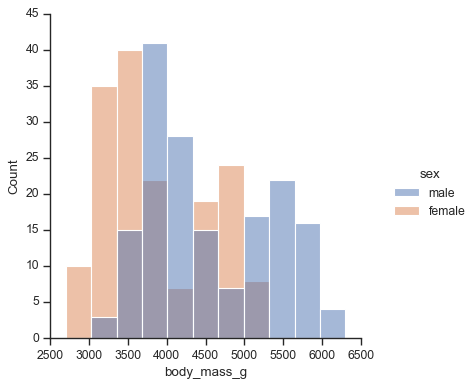

In [52]:
sns.displot(x = "body_mass_g", hue = "sex", data = penguins)

Stacked histograms

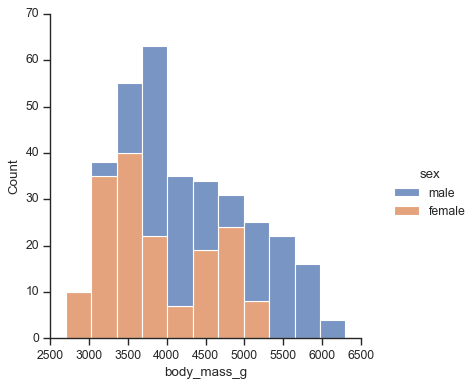

In [53]:
sns.displot(x = "body_mass_g", hue = "sex", data = penguins, multiple = "stack")

Density plots

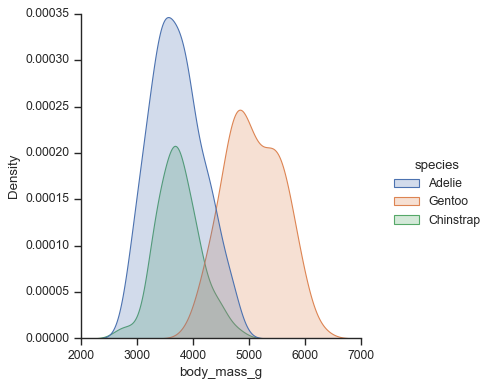

In [54]:
sns.displot(x = "body_mass_g", hue = "species", data = penguins, 
            kind = "kde", fill = True)

Stacked density plots

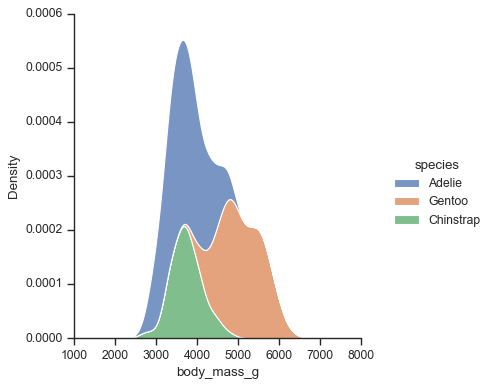

In [55]:
sns.displot(x = "body_mass_g", hue = "species", data = penguins, 
            kind = "kde", fill = True, multiple = "stack")